In [1]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg3.parquet')
oos = pd.read_parquet('oos_seg3.parquet')
oot = pd.read_parquet('oot_seg3.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)

Binning 

Skip SOHUUNHA: Biến hằng số (1 unique value)
Skip LTV: Biến hằng số (1 unique value)
Skip AVG_OD_DPD_12M: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[O, M]",225640,0.510143,191637,34003,0.150696,0.003514,0.000006,7.866416e-07
1,[F],216667,0.489857,183817,32850,0.151615,-0.003651,0.000007,8.171742e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442307,1.000000,375454,66853,0.151146,,0.000013,1.603816e-06


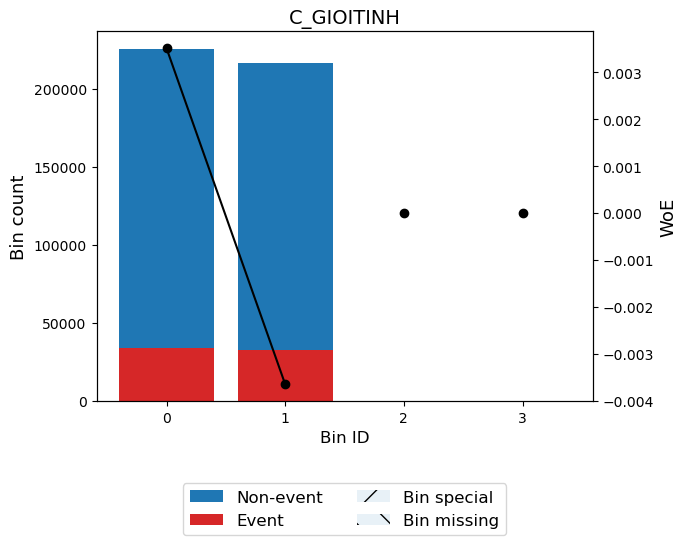


Processing: TRINHDO
   -> STATUS: OPTIMAL
   -> IV: 0.0977
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[4.0, 3.0]",68641,0.155189,62701,5940,0.086537,0.631028,0.049314,0.006064
1,"[2.0, nan]",216284,0.488991,186545,29739,0.137500,0.110573,0.005751,0.000719
2,[1.0],157382,0.355821,126208,31174,0.198079,-0.327293,0.042600,0.005301
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.097665,0.012084


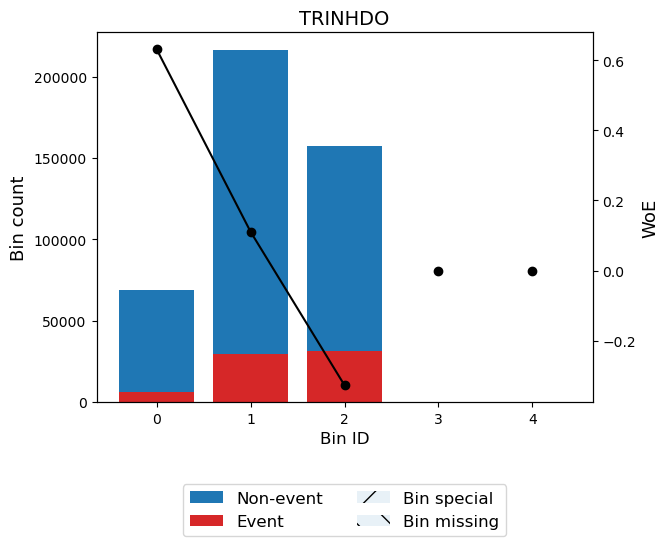


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0171
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],141526,0.319972,123525,18001,0.127192,0.200376,0.011970,0.001494
1,[Single],300781,0.680028,251929,48852,0.162417,-0.085288,0.005095,0.000637
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.017065,0.002130


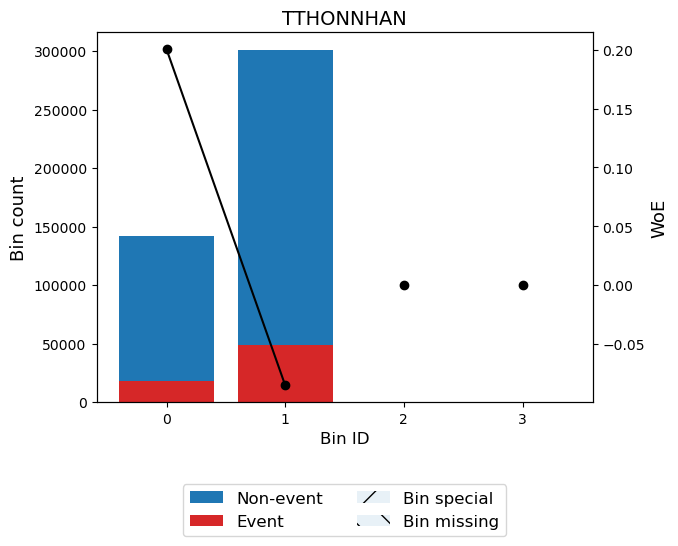


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",442307,1.0,375454,66853,0.151146,-0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,442307,1.0,375454,66853,0.151146,,0.0,0.0


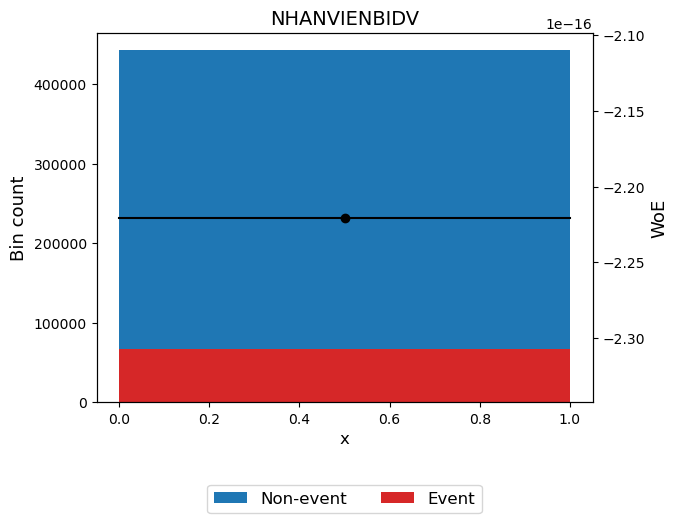


Processing: BASE_AUM
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[5, 0](0..1), coeff=16298, offset=0), IntAffine(expr=x[5, 1](0..1), coeff=5963, offset=0), IntAffine(expr=x[5, 2](0..1), coeff=4029, offset=0), IntAffine(expr=x[5, 3](0..1), coeff=388, offset=0), IntConstant(0)), IntConstant(0)

Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.0795
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 24.50)",86661,0.195930,67210,19451,0.224449,-0.485716,0.054372,0.006730
1,"[24.50, 27.50)",47377,0.107113,39904,7473,0.157735,-0.05046,0.000278,0.000035
2,"[27.50, 33.50)",112035,0.253297,96335,15700,0.140135,0.088531,0.001925,0.000240
3,"[33.50, 36.50)",54460,0.123127,47414,7046,0.129379,0.180818,0.003777,0.000471
4,"[36.50, inf)",141774,0.320533,124591,17183,0.121200,0.255476,0.019113,0.002383
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.079464,0.009860


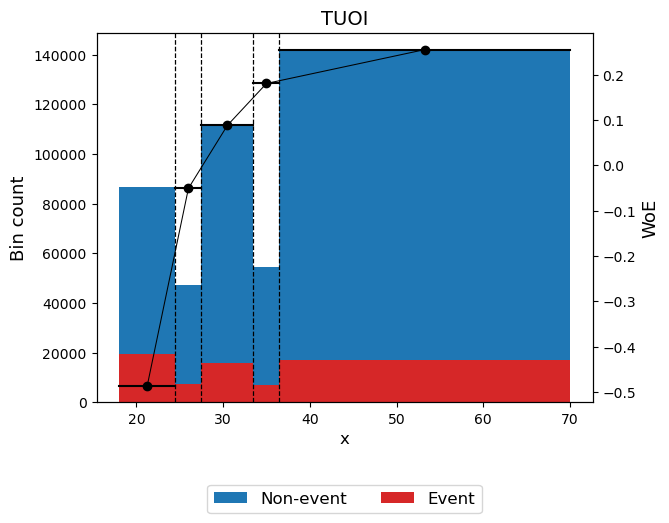


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.1903
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15002181.00)",64394,0.145587,45726,18668,0.289903,-0.829784,0.130650,1.587831e-02
1,"[15002181.00, 20315035.00)",147563,0.333621,126547,21016,0.142421,0.06969,0.001581,1.976116e-04
2,"[20315035.00, 23881394.00)",92166,0.208376,80155,12011,0.130319,0.1725,0.005835,7.284546e-04
3,"[23881394.00, 30350278.00)",71526,0.161711,63457,8069,0.112812,0.336693,0.016268,2.023924e-03
4,"[30350278.00, inf)",44235,0.100010,40564,3671,0.082989,0.676777,0.035956,4.410648e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,22423,0.050696,19005,3418,0.152433,-0.009993,0.000005,6.350470e-07
Totals,,442307,1.000000,375454,66853,0.151146,,0.190295,2.323958e-02


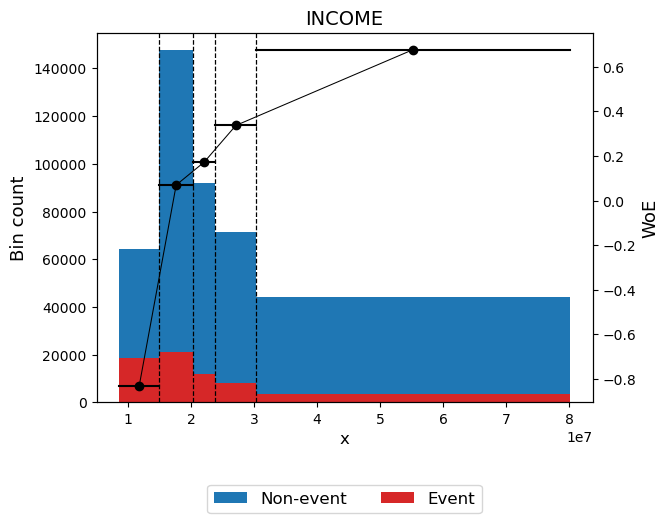


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0297
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 139701440.00)",50176,0.113442,45193,4983,0.099310,0.47927,0.021966,0.002720
1,"[139701440.00, 182147696.00)",46684,0.105547,40493,6191,0.132615,0.152393,0.002323,0.000290
2,"[182147696.00, 335789792.00)",164476,0.371859,138621,25855,0.157196,-0.0464,0.000814,0.000102
3,"[335789792.00, 441372832.00)",73706,0.166640,61759,11947,0.162090,-0.08288,0.001178,0.000147
4,"[441372832.00, inf)",107265,0.242513,89388,17877,0.166662,-0.116168,0.003407,0.000426
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.029688,0.003684


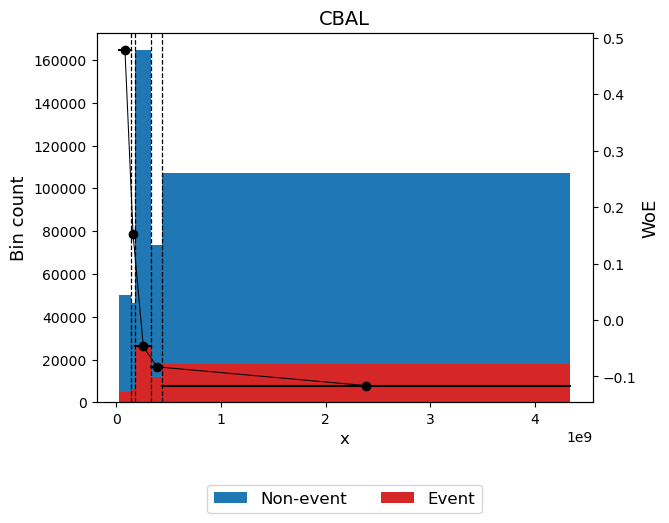


Processing: CBALORG
   -> STATUS: OPTIMAL
   -> IV: 0.0281
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 175212984.00)",71574,0.161820,63977,7597,0.106142,0.40513,0.022996,0.002855
1,"[175212984.00, 250567904.00)",78947,0.178489,66897,12050,0.152634,-0.01155,0.000024,0.000003
2,"[250567904.00, 311308400.00)",60726,0.137294,51274,9452,0.155650,-0.034682,0.000167,0.000021
3,"[311308400.00, 393385104.00)",68496,0.154861,57626,10870,0.158695,-0.057673,0.000526,0.000066
4,"[393385104.00, inf)",162564,0.367537,135680,26884,0.165375,-0.106872,0.004356,0.000544
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.028069,0.003489


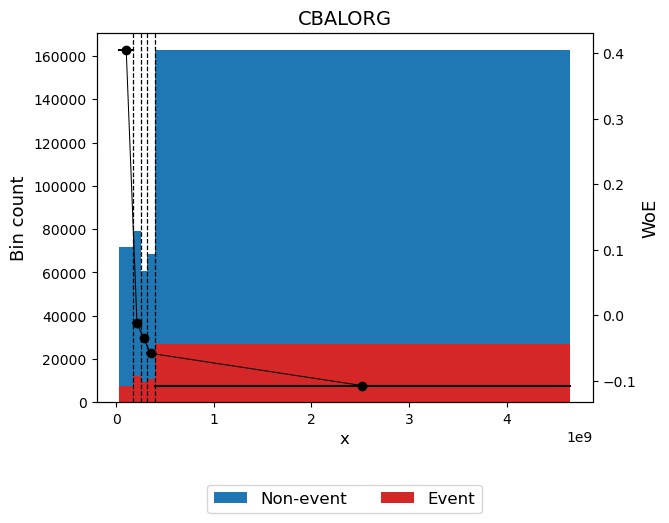


Processing: AFLIMT_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0692
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 435869776.00)",58809,0.132960,45152,13657,0.232226,-0.529857,0.044521,0.005501
1,"[435869776.00, 514844384.00)",65027,0.147018,53735,11292,0.173651,-0.16567,0.004272,0.000533
2,"[514844384.00, 592266144.00)",70694,0.159830,60551,10143,0.143478,0.061062,0.000583,0.000073
3,"[592266144.00, 779059840.00)",134785,0.304732,117015,17770,0.131840,0.159151,0.007298,0.000911
4,"[779059840.00, inf)",112992,0.255461,99001,13991,0.123823,0.231076,0.012571,0.001568
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.069246,0.008586


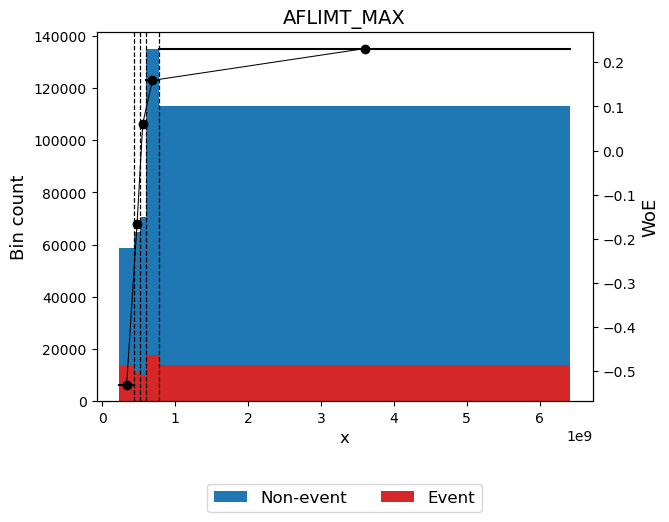


Processing: AFLIMT_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0692
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 392282800.00)",58809,0.132960,45152,13657,0.232226,-0.529857,0.044521,0.005501
1,"[392282800.00, 463359952.00)",65027,0.147018,53735,11292,0.173651,-0.16567,0.004272,0.000533
2,"[463359952.00, 533039536.00)",70694,0.159830,60551,10143,0.143478,0.061062,0.000583,0.000073
3,"[533039536.00, 701153856.00)",134785,0.304732,117015,17770,0.131840,0.159151,0.007298,0.000911
4,"[701153856.00, inf)",112992,0.255461,99001,13991,0.123823,0.231076,0.012571,0.001568
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.069246,0.008586


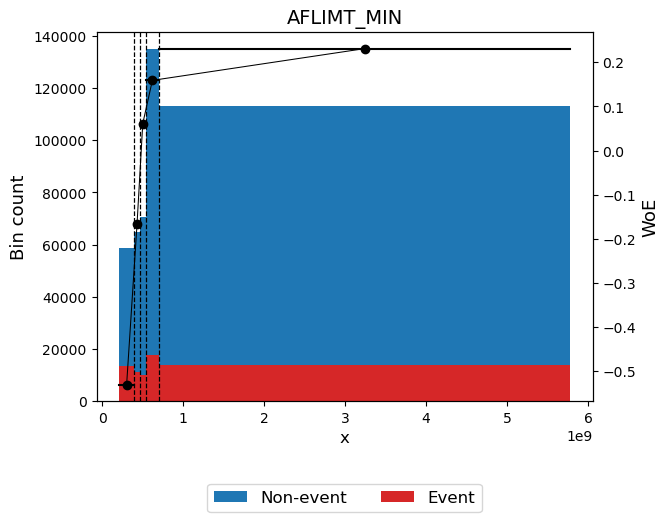


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0692
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 414076288.00)",58809,0.132960,45152,13657,0.232226,-0.529857,0.044521,0.005501
1,"[414076288.00, 489102160.00)",65027,0.147018,53735,11292,0.173651,-0.16567,0.004272,0.000533
2,"[489102160.00, 562652864.00)",70694,0.159830,60551,10143,0.143478,0.061062,0.000583,0.000073
3,"[562652864.00, 740106880.00)",134785,0.304732,117015,17770,0.131840,0.159151,0.007298,0.000911
4,"[740106880.00, inf)",112992,0.255461,99001,13991,0.123823,0.231076,0.012571,0.001568
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.069246,0.008586


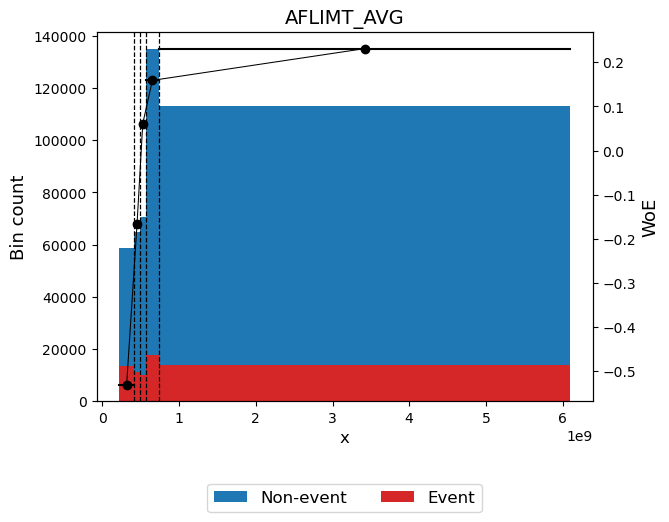


Processing: CBAL_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0260
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 158305256.00)",72696,0.164356,64824,7872,0.108287,0.382724,0.021013,2.610724e-03
1,"[158305256.00, 218797648.00)",70169,0.158643,59599,10570,0.150636,0.003979,0.000003,3.135616e-07
2,"[218797648.00, 347101360.00)",129054,0.291775,108689,20365,0.157802,-0.050967,0.000771,9.642355e-05
3,"[347101360.00, 417488544.00)",49361,0.111599,41396,7965,0.161362,-0.077512,0.000689,8.607686e-05
4,"[417488544.00, inf)",121027,0.273627,100946,20081,0.165922,-0.110828,0.003492,4.363236e-04
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442307,1.000000,375454,66853,0.151146,,0.025968,3.229862e-03


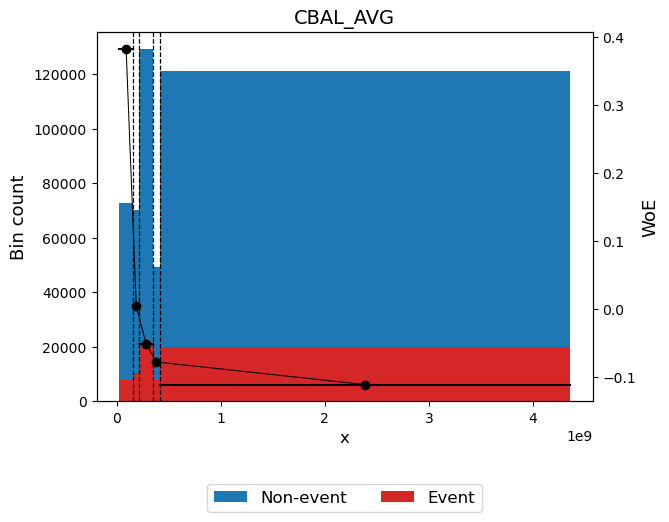


Processing: CBAL_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0262
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 190213248.00)",72528,0.163977,64688,7840,0.108096,0.384697,0.021166,0.002630
1,"[190213248.00, 249438640.00)",57179,0.129274,48637,8542,0.149391,0.01375,0.000024,0.000003
2,"[249438640.00, 416521632.00)",141825,0.320648,119463,22362,0.157673,-0.049996,0.000816,0.000102
3,"[416521632.00, 501196288.00)",49554,0.112035,41557,7997,0.161380,-0.07764,0.000694,0.000087
4,"[501196288.00, inf)",121221,0.274065,101109,20112,0.165912,-0.110757,0.003493,0.000436
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.026193,0.003258


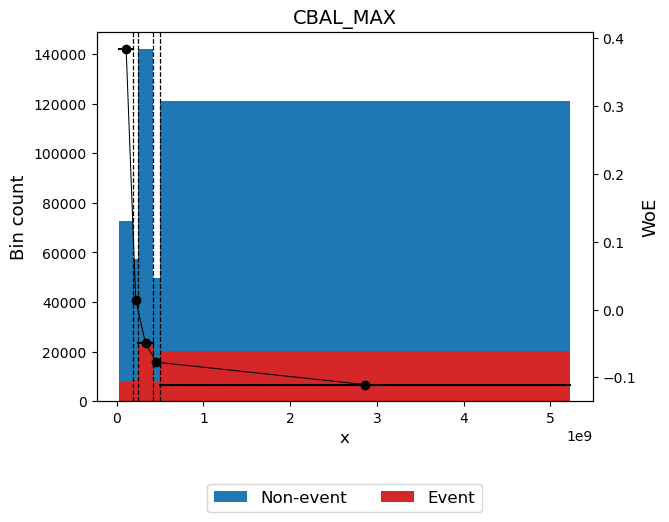


Processing: CBAL_MIN
   -> STATUS: OPTIMAL
   -> IV: 0.0260
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 126644204.00)",72696,0.164356,64824,7872,0.108287,0.382724,0.021013,2.610724e-03
1,"[126644204.00, 175038120.00)",70169,0.158643,59599,10570,0.150636,0.003979,0.000003,3.135616e-07
2,"[175038120.00, 277681088.00)",129054,0.291775,108689,20365,0.157802,-0.050967,0.000771,9.642355e-05
3,"[277681088.00, 333990832.00)",49361,0.111599,41396,7965,0.161362,-0.077512,0.000689,8.607686e-05
4,"[333990832.00, inf)",121027,0.273627,100946,20081,0.165922,-0.110828,0.003492,4.363236e-04
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,442307,1.000000,375454,66853,0.151146,,0.025968,3.229862e-03


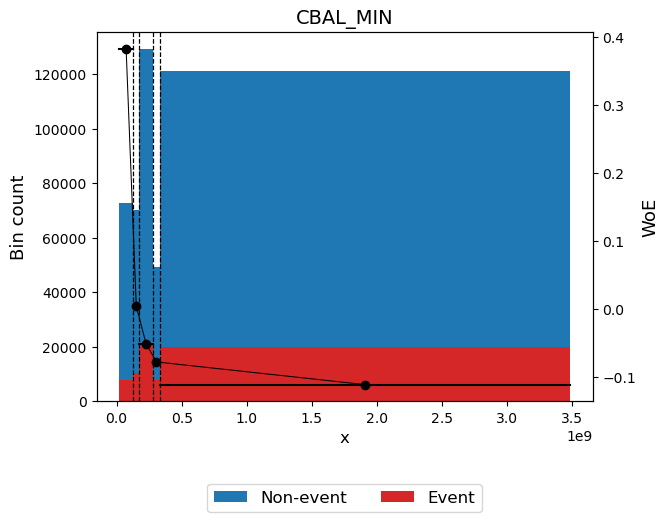


Processing: COLLATERAL_VALUE
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[3, 0](0..1), coeff=22784, offset=0), IntAffine(expr=x[3, 1](0..1), coeff=4514, offset=0), IntAffine(expr=x[3, 2](0..1), coeff=522, offset=0)), IntConstant(0)

Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2259
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 286294.50)",61399,0.138815,45500,15899,0.258946,-0.674184,0.078633,0.009647
1,"[286294.50, 532695.00)",85969,0.194365,68791,17178,0.199816,-0.338196,0.024936,0.003102
2,"[532695.00, 876442.00)",101411,0.229277,85850,15561,0.153445,-0.017806,0.000073,0.000009
3,"[876442.00, 1422122.50)",113833,0.257362,101393,12440,0.109283,0.372447,0.031276,0.003887
4,"[1422122.50, inf)",79695,0.180180,73920,5775,0.072464,0.823805,0.091029,0.011067
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.225946,0.027713


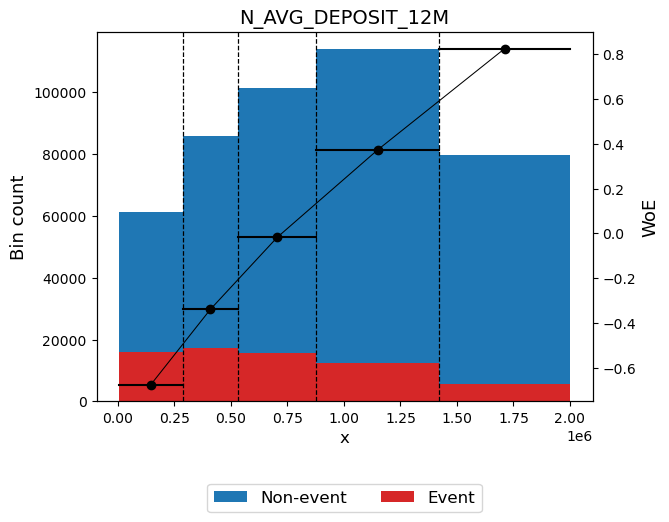


Processing: N_AVG_DEPOSIT_6M
   -> STATUS: OPTIMAL
   -> IV: 0.2259
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 286294.50)",61399,0.138815,45500,15899,0.258946,-0.674184,0.078633,0.009647
1,"[286294.50, 532695.00)",85969,0.194365,68791,17178,0.199816,-0.338196,0.024936,0.003102
2,"[532695.00, 876442.00)",101411,0.229277,85850,15561,0.153445,-0.017806,0.000073,0.000009
3,"[876442.00, 1422122.50)",113833,0.257362,101393,12440,0.109283,0.372447,0.031276,0.003887
4,"[1422122.50, inf)",79695,0.180180,73920,5775,0.072464,0.823805,0.091029,0.011067
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.225946,0.027713


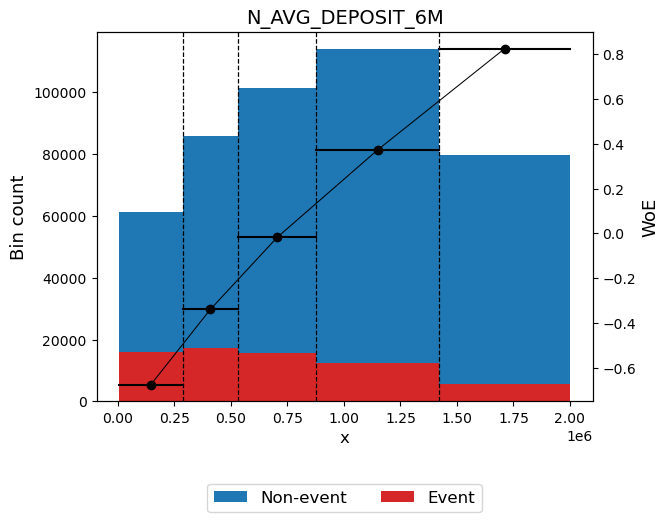


Processing: N_AVG_DD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2259
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 57258.50)",61399,0.138815,45500,15899,0.258946,-0.674184,0.078633,0.009647
1,"[57258.50, 106539.00)",85969,0.194365,68791,17178,0.199816,-0.338196,0.024936,0.003102
2,"[106539.00, 175288.00)",101411,0.229277,85850,15561,0.153445,-0.017806,0.000073,0.000009
3,"[175288.00, 284424.00)",113833,0.257362,101393,12440,0.109283,0.372447,0.031276,0.003887
4,"[284424.00, inf)",79695,0.180180,73920,5775,0.072464,0.823805,0.091029,0.011067
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.225946,0.027713


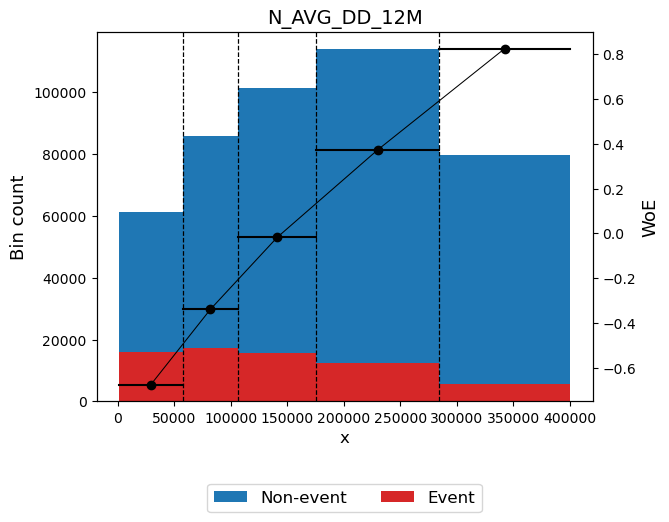


Processing: N_AVG_CD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2259
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 229048.50)",61404,0.138827,45504,15900,0.258941,-0.674159,0.078633,0.009647
1,"[229048.50, 426156.00)",85964,0.194354,68787,17177,0.199816,-0.338196,0.024934,0.003102
2,"[426156.00, 701154.00)",101411,0.229277,85850,15561,0.153445,-0.017806,0.000073,0.000009
3,"[701154.00, 1137698.50)",113833,0.257362,101393,12440,0.109283,0.372447,0.031276,0.003887
4,"[1137698.50, inf)",79695,0.180180,73920,5775,0.072464,0.823805,0.091029,0.011067
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.225945,0.027713


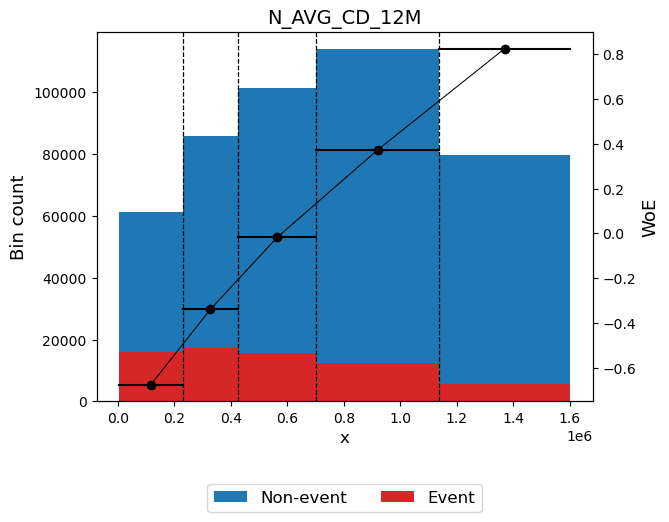


Processing: FLAG_SALARY_ACC
   -> STATUS: OPTIMAL
   -> IV: 0.1725
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",67872,0.15345,48202,19670,0.289810,-0.829334,0.137540,0.016716
1,"[0.50, inf)",374435,0.84655,327252,47183,0.126011,0.211057,0.035003,0.004367
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.00000,375454,66853,0.151146,,0.172543,0.021083


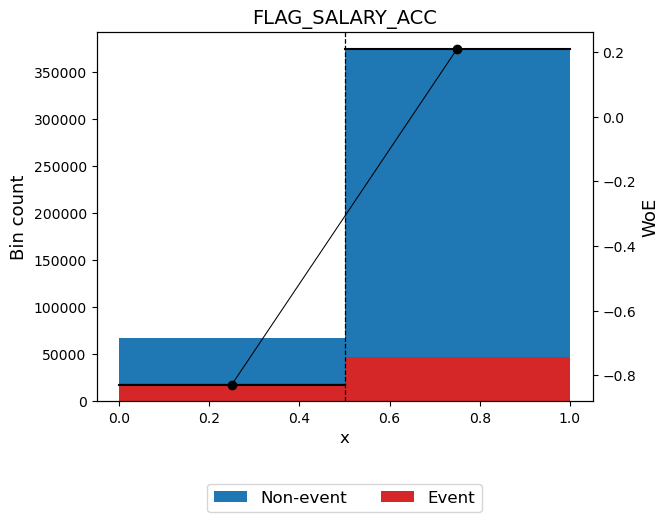


Processing: FLAG_DEPOSIT
   -> STATUS: OPTIMAL
   -> IV: 0.1542
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",279036,0.630865,226700,52336,0.187560,-0.259697,0.046499,0.005796
1,"[0.50, inf)",163271,0.369135,148754,14517,0.088914,0.601334,0.107669,0.013259
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.154167,0.019055


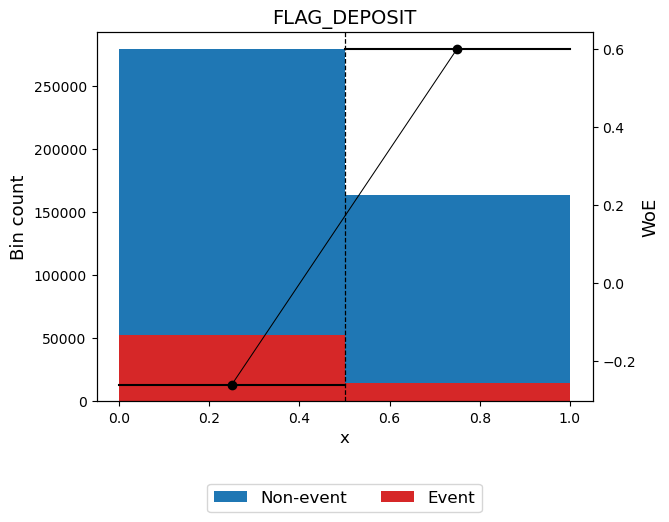


Processing: UTILIZATION_RATE
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[8, 0](0..1), coeff=18294, offset=0), IntAffine(expr=x[8, 1](0..1), coeff=9678, offset=0), IntAffine(expr=x[8, 2](0..1), coeff=9804, offset=0), IntAffine(expr=x[8, 3](0..1), coeff=7107, offset=0), IntAffine(expr=x[8, 4](0..1), coeff=5339, offset=0), IntAffine(expr=x[8, 5](0..1), coeff=2835, offset=0), IntAffine(expr=x[8, 6](0..1), coeff=1236, offset=0), IntAffine(expr=x[8, 7](0..1), coeff=496, offset=0)), IntConstant(0)

Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",98928,0.223664,84057,14871,0.150321,0.006442,9.262064e-06,1.157756e-06
1,"[0.50, 1.50)",148186,0.335030,125797,22389,0.151087,0.00046,7.086506e-08,8.858133e-09
2,"[1.50, inf)",195193,0.441307,165600,29593,0.151609,-0.003602,5.734118e-06,7.167643e-07
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,442307,1.000000,375454,66853,0.151146,,1.506705e-05,1.883378e-06


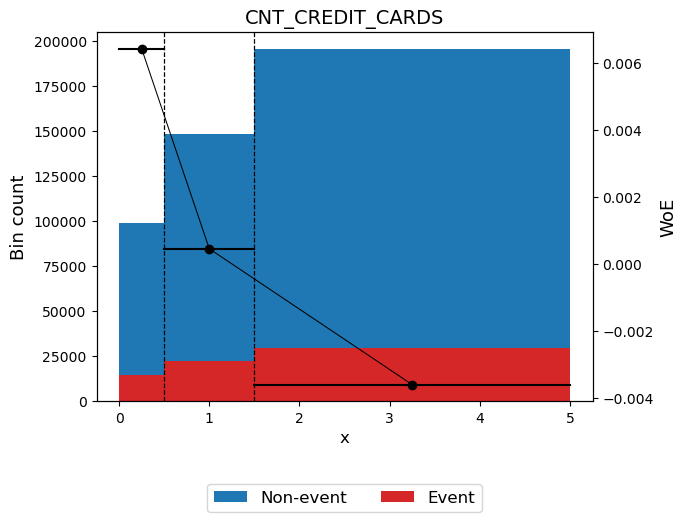


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0110
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30980934.00)",374589,0.846898,320189,54400,0.145226,0.046908,0.001833,0.000229
1,"[30980934.00, inf)",67718,0.153102,55265,12453,0.183895,-0.235462,0.009202,0.001148
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.011035,0.001377


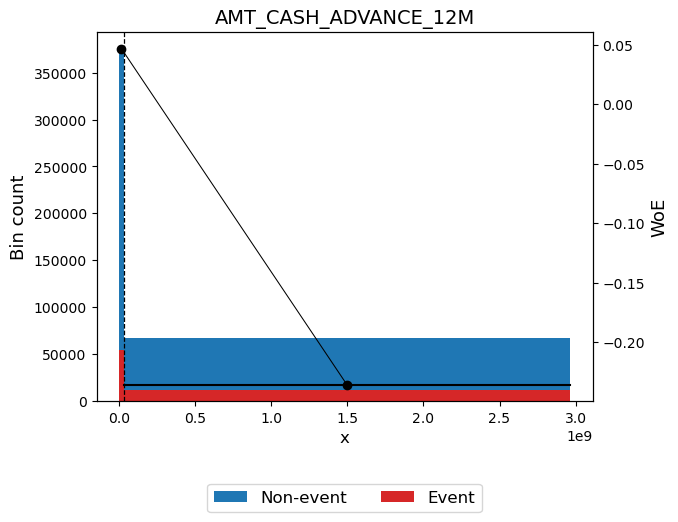


Processing: FLAG_CASH_ADVANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0110
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",374587,0.846894,320187,54400,0.145227,0.046901,0.001833,0.000229
1,"[0.50, inf)",67720,0.153106,55267,12453,0.183890,-0.235425,0.009199,0.001147
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.011032,0.001376


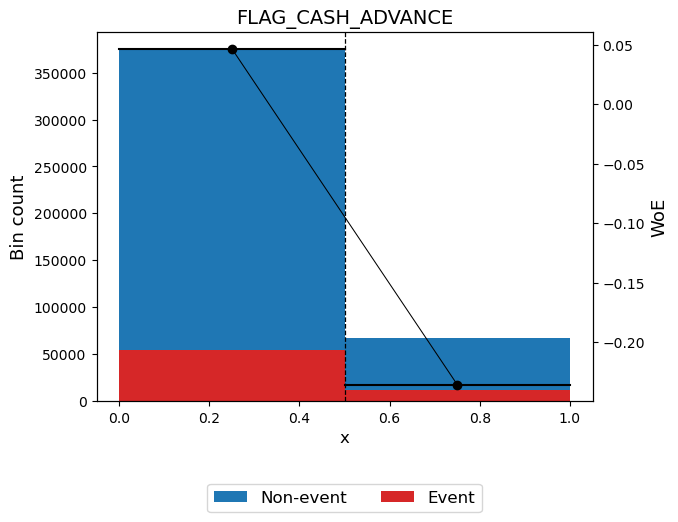


Processing: PCT_PAYMENT_TO_BALANCE
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[4, 0](0..1), coeff=6125, offset=0), IntAffine(expr=x[4, 1](0..1), coeff=3110, offset=0), IntAffine(expr=x[4, 2](0..1), coeff=1475, offset=0), IntAffine(expr=x[4, 3](0..1), coeff=318, offset=0)), IntConstant(0)

Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0642
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",301887,0.682528,263021,38866,0.128744,0.186474,0.022223,0.002774
1,"[0.50, 1.50)",56936,0.128725,46422,10514,0.184663,-0.240574,0.008090,0.001009
2,"[1.50, inf)",83484,0.188747,66011,17473,0.209298,-0.396475,0.033918,0.004212
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.064231,0.007995


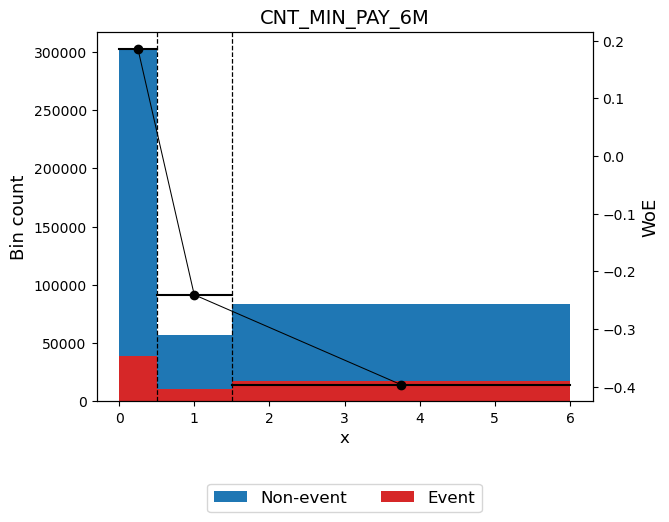


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.0595
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",304084,0.687495,264640,39444,0.129714,0.177849,0.020425,0.002550
1,"[0.50, 4.50)",88461,0.199999,71573,16888,0.190909,-0.281525,0.017450,0.002174
2,"[4.50, inf)",49762,0.112506,39241,10521,0.211426,-0.409291,0.021635,0.002686
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.059509,0.007409


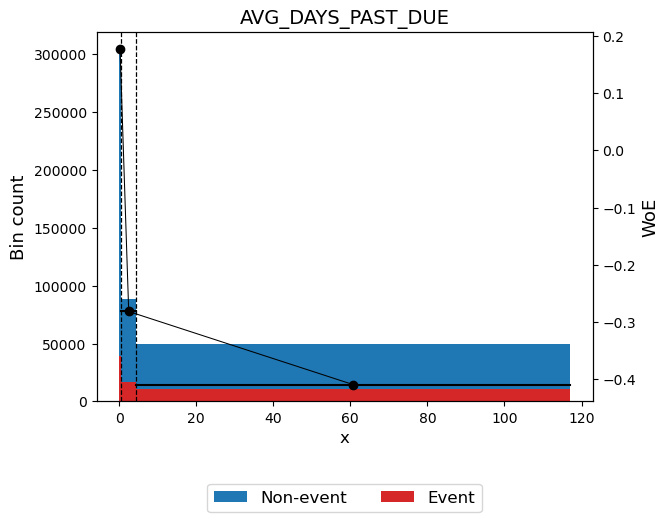


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.1686
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.60)",45291,0.102397,41588,3703,0.081760,0.693029,0.038378,0.004703
1,"[0.60, 1.00)",114126,0.258024,102665,11461,0.100424,0.466882,0.047625,0.005900
2,"[1.00, 1.63)",161703,0.365590,137028,24675,0.152595,-0.011245,0.000046,0.000006
3,"[1.63, 2.00)",58494,0.132248,47231,11263,0.192550,-0.292112,0.012467,0.001553
4,"[2.00, inf)",62693,0.141741,46942,15751,0.251240,-0.633631,0.070066,0.008615
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.168582,0.020776


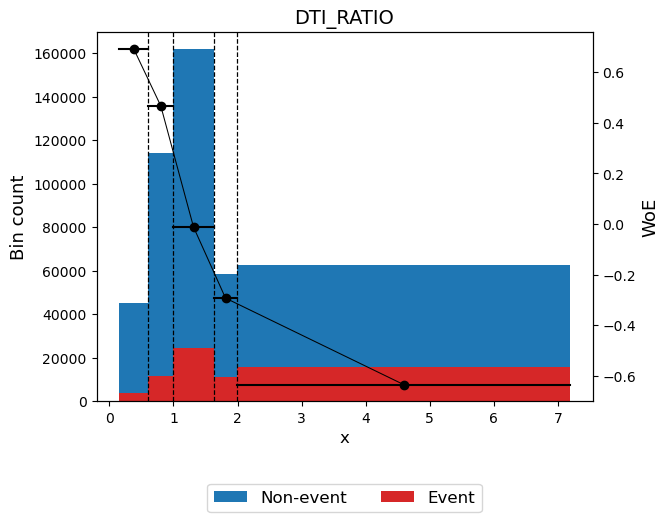


Processing: PTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.1467
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.46)",78884,0.178347,72167,6717,0.085150,0.648701,0.059511,0.007311
1,"[0.46, 0.60)",58377,0.131983,52556,5821,0.099714,0.474767,0.025119,0.003111
2,"[0.60, 0.82)",91141,0.206058,78269,12872,0.141232,0.079457,0.001265,0.000158
3,"[0.82, 1.10)",83210,0.188127,69552,13658,0.164139,-0.097891,0.001865,0.000233
4,"[1.10, inf)",130695,0.295485,102910,27785,0.212594,-0.416281,0.058912,0.007311
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.146672,0.018124


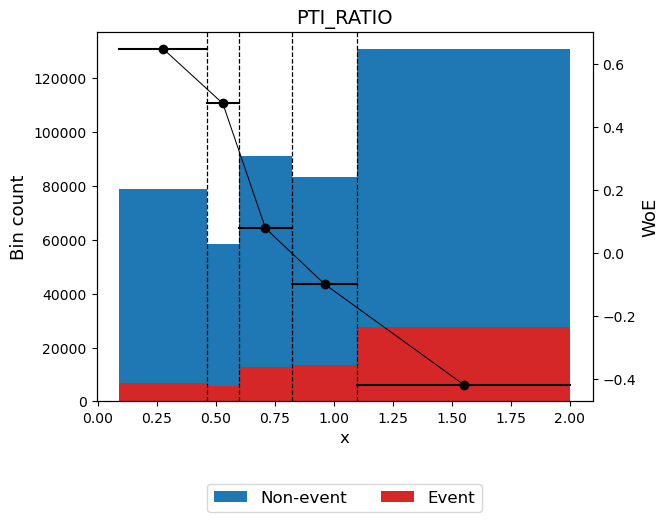


Processing: MOB
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[9, 0](0..1), coeff=2, offset=0), IntAffine(expr=x[9, 1](0..1), coeff=12, offset=0), IntAffine(expr=x[9, 2](0..1), coeff=-44, offset=0), IntAffine(expr=x[9, 3](0..1), coeff=24, offset=0), IntAffine(expr=x[9, 4](0..1), coeff=38, offset=0), IntAffine(expr=x[9, 5](0..1), coeff=-15, offset=0), IntAffine(expr=x[9, 6](0..1), coeff=16, offset=0), IntAffine(expr=x[9, 7](0..1), coeff=-46, offset=0), IntAffine(expr=x[9, 8](0..1), coeff=48, offset=0)), IntConstant(0)

Processing: CNT_OTHER_PRODUCTS
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
 

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26.50)",76169,0.172208,65894,10275,0.134897,0.132694,0.002894,0.000361
1,"[26.50, 28.09)",50709,0.114647,43764,6945,0.136958,0.11515,0.001460,0.000182
2,"[28.09, 30.71)",86518,0.195606,74573,11945,0.138064,0.105826,0.002111,0.000264
3,"[30.71, 36.00)",182103,0.411712,156158,25945,0.142474,0.06925,0.001927,0.000241
4,"[36.00, inf)",46808,0.105827,35065,11743,0.250876,-0.631694,0.051963,0.006390
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.060355,0.007438


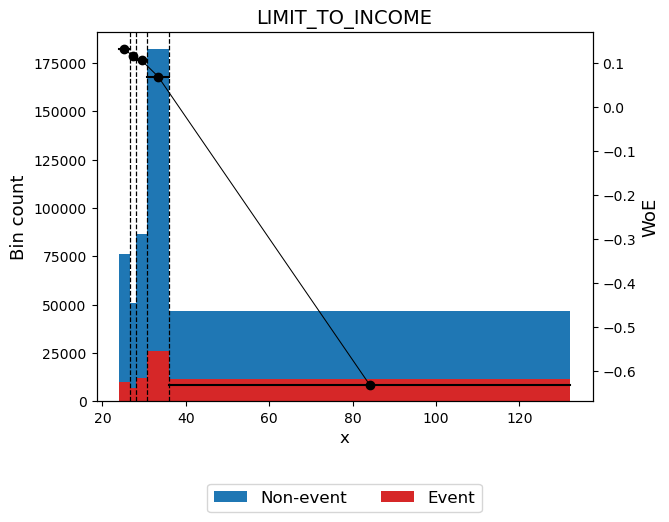


Processing: AMT_VAR_6M
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[10, 0](0..1), coeff=-1, offset=0), IntAffine(expr=x[10, 1](0..1), coeff=-3, offset=0), IntAffine(expr=x[10, 2](0..1), coeff=4, offset=0), IntAffine(expr=x[10, 3](0..1), coeff=-3, offset=0), IntAffine(expr=x[10, 4](0..1), coeff=-28, offset=0), IntAffine(expr=x[10, 5](0..1), coeff=-3, offset=0), IntAffine(expr=x[10, 6](0..1), coeff=34, offset=0), IntConstant(0), IntAffine(expr=x[10, 8](0..1), coeff=-29, offset=0), IntAffine(expr=x[10, 9](0..1), coeff=29, offset=0)), IntConstant(0)

Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0071
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 81431004.00)",146231,0.330610,125968,20263,0.138568,0.101592,0.003293,0.000411
1,"[81431004.00, 126393644.00)",71323,0.161252,60924,10399,0.145801,0.042278,0.000284,0.000035
2,"[126393644.00, 168152488.00)",53063,0.119969,44756,8307,0.156550,-0.041513,0.000210,0.000026
3,"[168152488.00, 329591168.00)",113147,0.255811,95109,18038,0.159421,-0.063097,0.001041,0.000130
4,"[329591168.00, inf)",58543,0.132358,48697,9846,0.168184,-0.127088,0.002234,0.000279
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.007061,0.000882


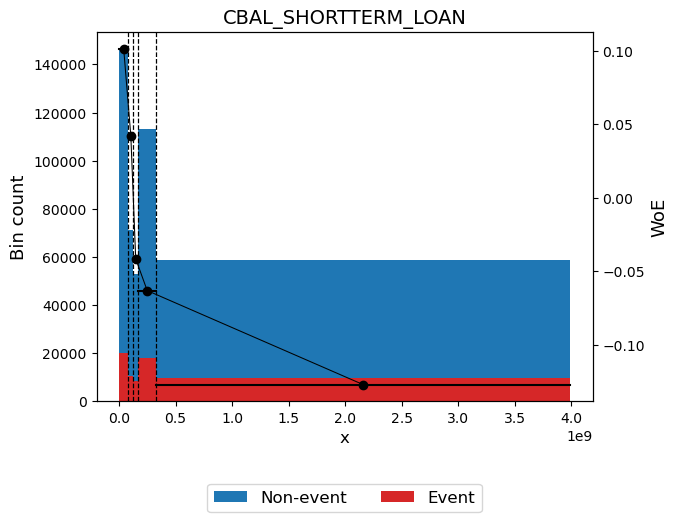


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0071
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 29016791.00)",52664,0.119067,45410,7254,0.137741,0.10854,0.001350,0.000169
1,"[29016791.00, 86582472.00)",102101,0.230837,87847,14254,0.139607,0.092919,0.001929,0.000241
2,"[86582472.00, 138022128.00)",78256,0.176927,66831,11425,0.145995,0.040723,0.000289,0.000036
3,"[138022128.00, 182220592.00)",52550,0.118809,44266,8284,0.157640,-0.049749,0.000299,0.000037
4,"[182220592.00, inf)",156736,0.354360,131100,25636,0.163562,-0.093677,0.003212,0.000401
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.007080,0.000885


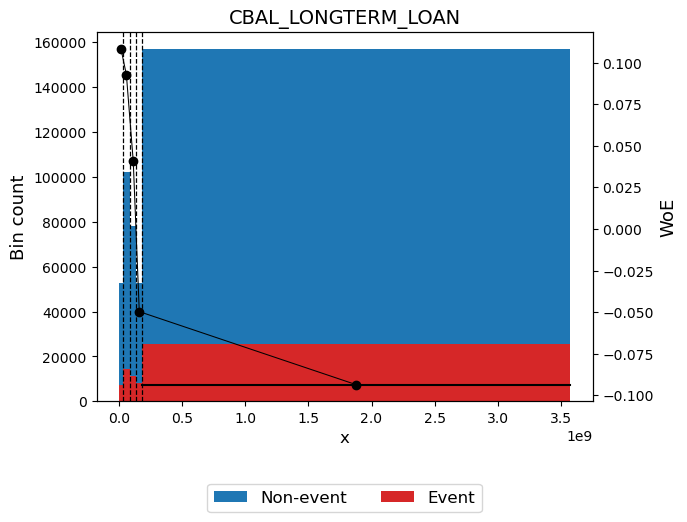


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0260
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",380809,0.860961,326585,54224,0.142392,0.069927,0.004108,0.000513
1,"[0.50, inf)",61498,0.139039,48869,12629,0.205356,-0.372492,0.021883,0.002720
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.025991,0.003233


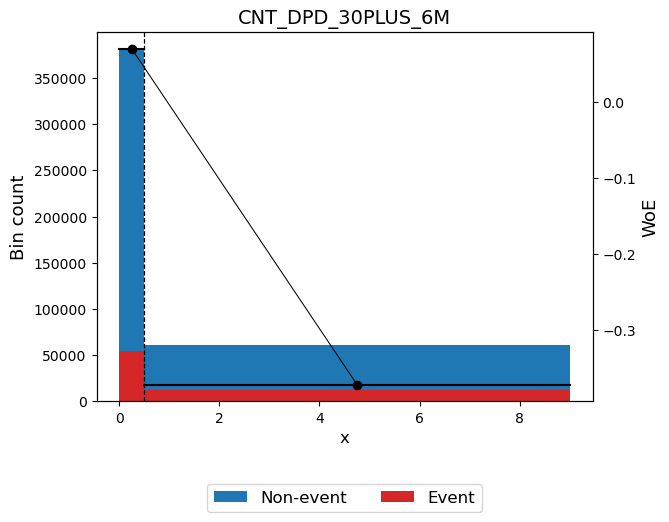


Processing: OCCUPATION_TYPE
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=5, offset=0), IntConstant(0)), IntConstant(0)

Processing: DURATION_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[4, 0](0..1), coeff=-7, offset=0), IntAffine(expr=x[4, 1](0..1), coeff=5, offset=0), IntAffine(expr=x[4, 2](0..1), coeff=2, offset=0), IntConstant(0)), IntConstant(0)

Processing: REMAINING_DURATION_MAX
   -> ERROR: __radd__(): incompatible function arguments. The fo

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.63)",58614,0.132519,53005,5609,0.095694,0.520374,0.029805,0.003684
1,"[6.63, 8.51)",119434,0.270025,104277,15157,0.126907,0.202949,0.010353,0.001292
2,"[8.51, 9.97)",112054,0.253340,94769,17285,0.154256,-0.024037,0.000148,0.000018
3,"[9.97, 12.02)",107115,0.242173,87773,19342,0.180572,-0.213165,0.011840,0.001477
4,"[12.02, inf)",45090,0.101943,35630,9460,0.209803,-0.399524,0.018620,0.002312
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.070766,0.008784


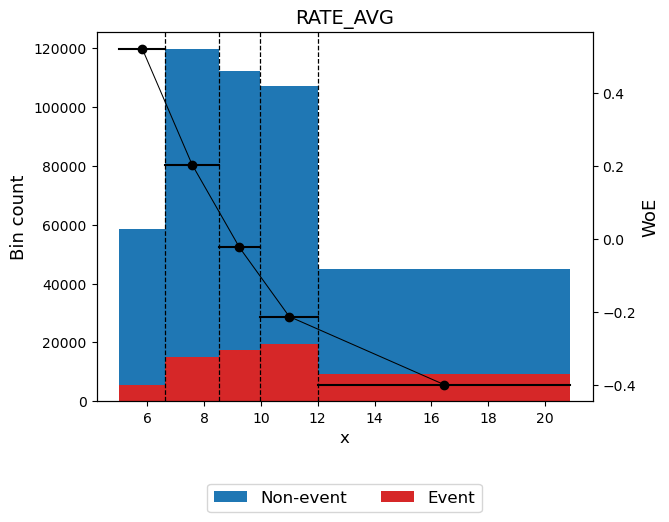


Processing: PURCOD_MAX
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=6, offset=0), IntConstant(0)), IntConstant(0)

Processing: PURCOD_MIN
   -> ERROR: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[2, 0](0..1), coeff=6, offset=0), IntConstant(0)), IntConstant(0)

Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.9958
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",58467,0.132186,57485,982,0.016796,2.344048,0.324461,0.033252
1,"[1.50, 9.50)",132674,0.299959,127283,5391,0.040633,1.436042,0.371032,0.042764
2,"[9.50, 19.50)",83293,0.188315,68886,14407,0.172968,-0.160901,0.005153,0.000643
3,"[19.50, 46.50)",101652,0.229822,77041,24611,0.242110,-0.584496,0.095239,0.011738
4,"[46.50, inf)",66221,0.149717,44759,21462,0.324097,-0.990631,0.199929,0.024017
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.995814,0.112415


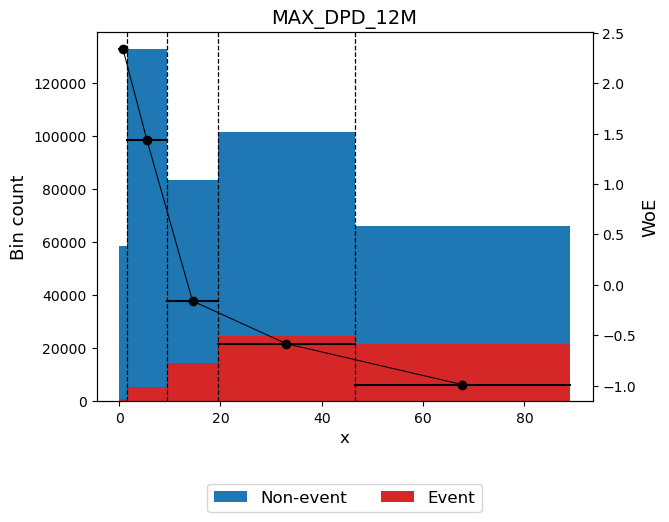


Processing: MAX_DPD_12M_OBS
   -> STATUS: OPTIMAL
   -> IV: 0.9958
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",58467,0.132186,57485,982,0.016796,2.344048,0.324461,0.033252
1,"[1.50, 9.50)",132674,0.299959,127283,5391,0.040633,1.436042,0.371032,0.042764
2,"[9.50, 19.50)",83293,0.188315,68886,14407,0.172968,-0.160901,0.005153,0.000643
3,"[19.50, 46.50)",101652,0.229822,77041,24611,0.242110,-0.584496,0.095239,0.011738
4,"[46.50, inf)",66221,0.149717,44759,21462,0.324097,-0.990631,0.199929,0.024017
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.995814,0.112415


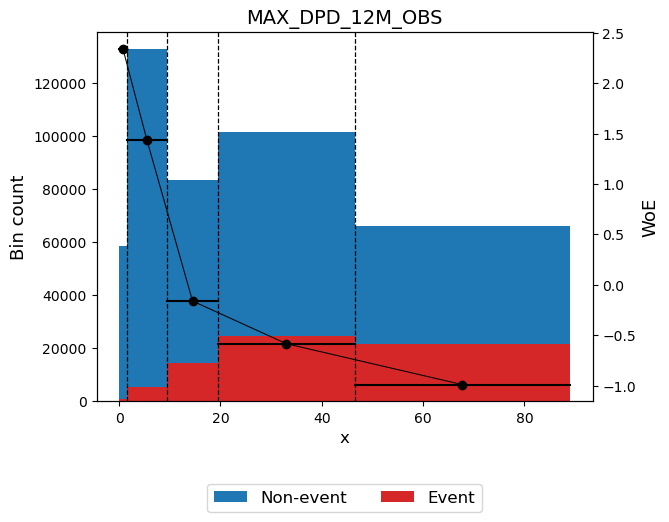


Processing: SUM_ALL_OD_12M
   -> STATUS: OPTIMAL
   -> IV: 0.9071
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.50)",64287,0.145345,63158,1129,0.017562,2.298667,0.347857,0.035889
1,"[2.50, 11.50)",87934,0.198808,84479,3455,0.039291,1.471041,0.254967,0.029276
2,"[11.50, 23.50)",71210,0.160997,63776,7434,0.104395,0.423673,0.024855,0.003084
3,"[23.50, 63.50)",114585,0.259062,90914,23671,0.206580,-0.379976,0.042531,0.005285
4,"[63.50, inf)",104291,0.235789,73127,31164,0.298818,-0.872706,0.236841,0.028700
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.907052,0.102233


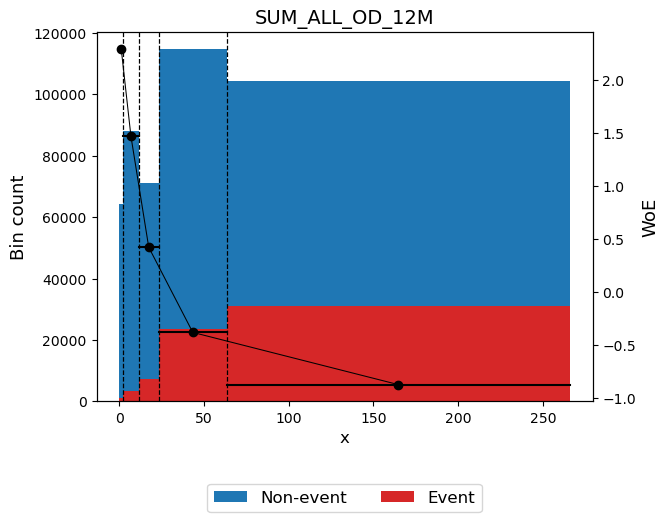


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1366
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 56593224.00)",55539,0.125567,52621,2918,0.052540,1.166577,0.112580,0.013325
1,"[56593224.00, 81365404.00)",44869,0.101443,39392,5477,0.122066,0.247365,0.005687,0.000709
2,"[81365404.00, 133197972.00)",109466,0.247489,91360,18106,0.165403,-0.107075,0.002945,0.000368
3,"[133197972.00, 220686416.00)",131950,0.298322,109371,22579,0.171118,-0.147914,0.006869,0.000858
4,"[220686416.00, inf)",100483,0.227179,82710,17773,0.176876,-0.18798,0.008564,0.001069
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.136646,0.016329


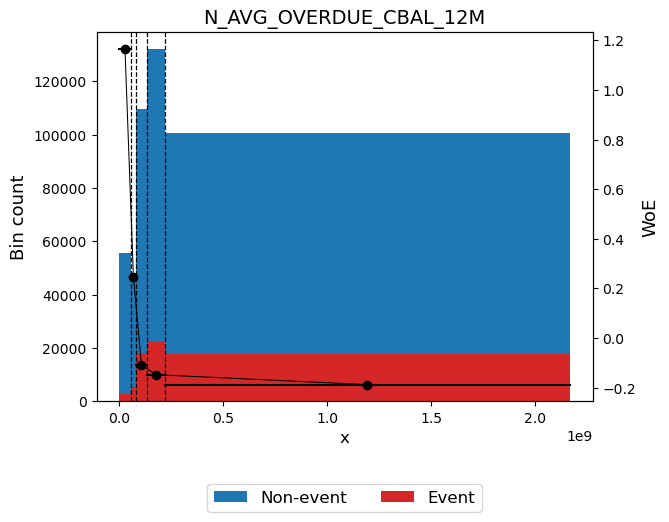


Processing: CBAL_TO_INC_12MON
   -> STATUS: OPTIMAL
   -> IV: 0.1686
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.25)",45291,0.102397,41588,3703,0.081760,0.693029,0.038378,0.004703
1,"[7.25, 12.00)",114126,0.258024,102665,11461,0.100424,0.466882,0.047625,0.005900
2,"[12.00, 19.52)",161703,0.365590,137028,24675,0.152595,-0.011245,0.000046,0.000006
3,"[19.52, 23.99)",58494,0.132248,47231,11263,0.192550,-0.292112,0.012467,0.001553
4,"[23.99, inf)",62693,0.141741,46942,15751,0.251240,-0.633631,0.070066,0.008615
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.168582,0.020776


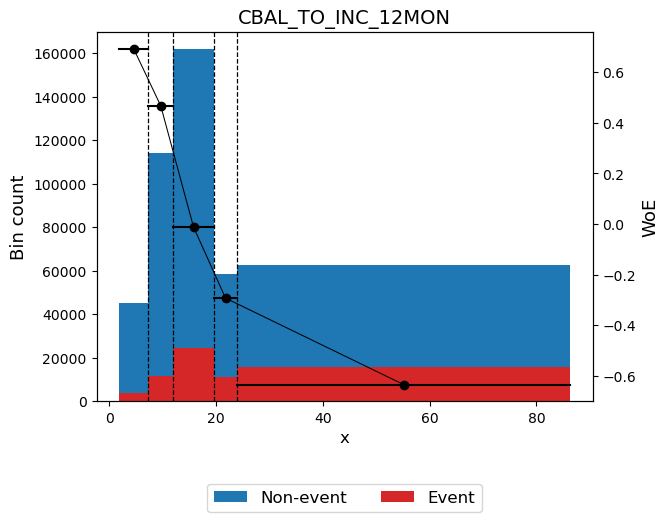


Processing: REAL_GDP_GROWTH_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0032
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.97)",217979,0.492823,183421,34558,0.158538,-0.056495,0.001604,0.000200
1,"[4.97, inf)",224328,0.507177,192033,32295,0.143963,0.057115,0.001622,0.000203
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,442307,1.000000,375454,66853,0.151146,,0.003226,0.000403


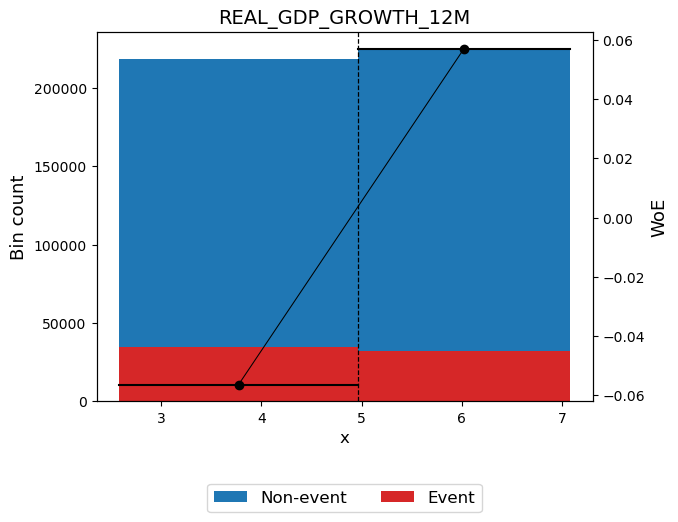

In [4]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", "PURCOD_MIN",
    "OCCUPATION_TYPE", "TRINHDO", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", "SOCIF", "year",
    "bad_current", "CASE_ID", target_col,
    "SNAPSHOT_DATE", "CURE_DATE"
]


candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="cp",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [5]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 38


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M_OBS,0.9958,Tăng (Thuận),13.22%,100.00%,6,PASS
1,MAX_DPD_12M,0.9958,Tăng (Thuận),13.22%,100.00%,6,PASS
2,SUM_ALL_OD_12M,0.9071,Tăng (Thuận),14.53%,100.00%,6,PASS
3,N_AVG_DEPOSIT_12M,0.2259,Giảm (Nghịch),13.88%,100.00%,6,PASS
4,N_AVG_DD_12M,0.2259,Giảm (Nghịch),13.88%,100.00%,6,PASS
5,N_AVG_DEPOSIT_6M,0.2259,Giảm (Nghịch),13.88%,100.00%,6,PASS
6,N_AVG_CD_12M,0.2259,Giảm (Nghịch),13.88%,100.00%,6,PASS
7,INCOME,0.1903,Giảm (Nghịch),5.07%,100.00%,7,PASS
8,FLAG_SALARY_ACC,0.1725,Giảm (Nghịch),15.34%,100.00%,3,PASS
9,DTI_RATIO,0.1686,Tăng (Thuận),10.24%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [6]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 9 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['TTHONNHAN', 'AMT_CASH_ADVANCE_12M', 'FLAG_CASH_ADVANCE', 'CBAL_LONGTERM_LOAN', 'CBAL_SHORTTERM_LOAN', 'REAL_GDP_GROWTH_12M', 'CNT_CREDIT_CARDS', 'C_GIOITINH', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 29


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...
  -> Đã đưa biến 'DTI_RATIO' lên vị trí ưu tiên số 1.
  -> Đang tính toán WoE cho 29 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 29
Số biến giữ lại:   13
Số biến bị loại:   16

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,MAX_DPD_12M_OBS,0.9958,Corr với MAX_DPD_12M (r=1.00)
1,SUM_ALL_OD_12M,0.9071,Corr với MAX_DPD_12M (r=0.94)
2,N_AVG_DEPOSIT_6M,0.2259,Corr với N_AVG_DEPOSIT_12M (r=1.00)
3,N_AVG_DD_12M,0.2259,Corr với N_AVG_DEPOSIT_12M (r=1.00)
4,N_AVG_CD_12M,0.2259,Corr với N_AVG_DEPOSIT_12M (r=1.00)
5,FLAG_SALARY_ACC,0.1725,Corr với INCOME (r=0.88)
6,CBAL_TO_INC_12MON,0.1686,Corr với DTI_RATIO (r=1.00)
7,FLAG_DEPOSIT,0.1542,Corr với N_AVG_DEPOSIT_12M (r=0.80)
8,PTI_RATIO,0.1467,Corr với DTI_RATIO (r=0.81)
9,AFLIMT_MAX,0.0692,Corr với INCOME (r=0.73)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,0.9958,13.22%,100.00%
1,N_AVG_DEPOSIT_12M,0.2259,13.88%,100.00%
2,INCOME,0.1903,5.07%,100.00%
3,DTI_RATIO,0.1686,10.24%,100.00%
4,N_AVG_OVERDUE_CBAL_12M,0.1366,10.14%,100.00%
5,TRINHDO,0.0977,15.52%,100.00%
6,TUOI,0.0795,10.71%,100.00%
7,RATE_AVG,0.0708,10.19%,100.00%
8,CNT_MIN_PAY_6M,0.0642,12.87%,100.00%
9,LIMIT_TO_INCOME,0.0604,10.58%,100.00%


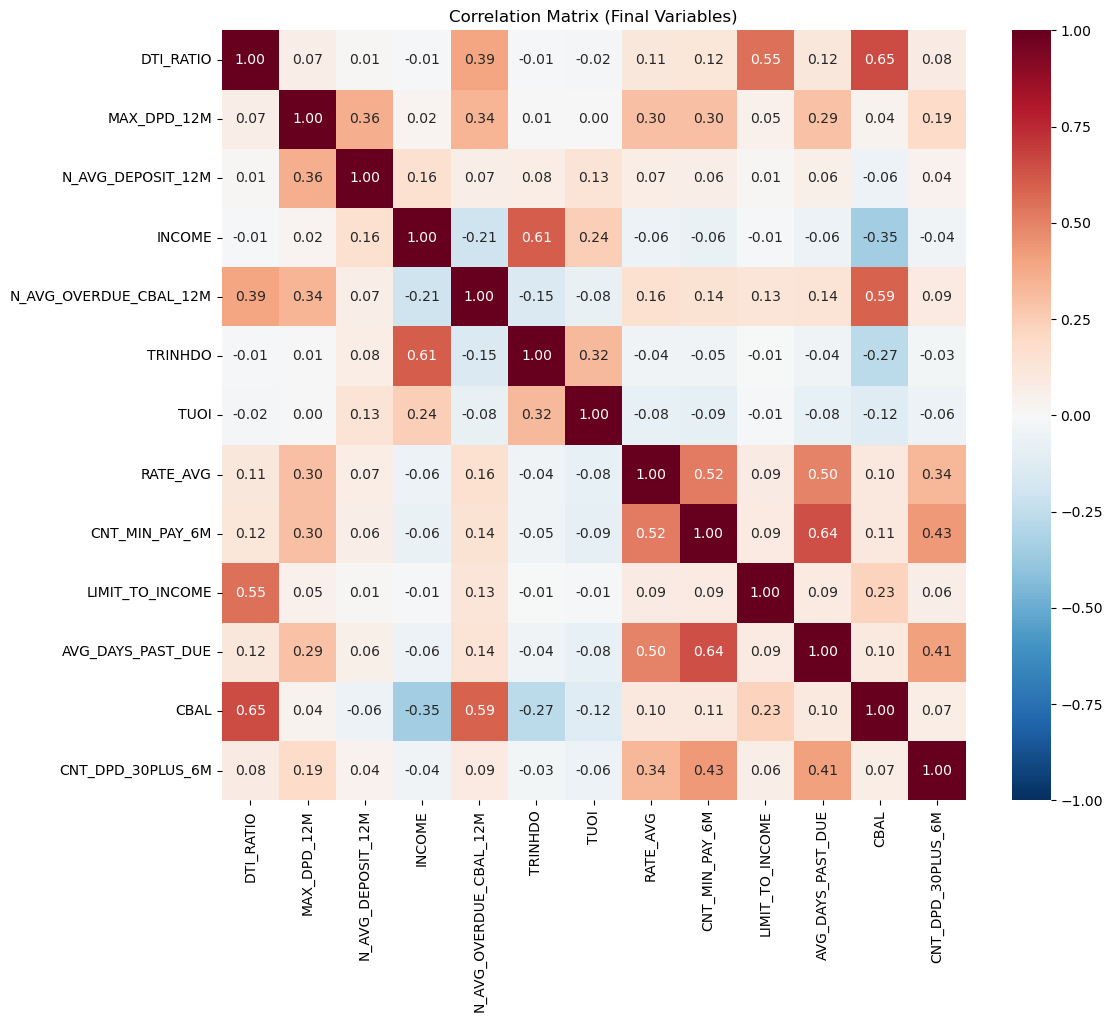

In [7]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7, Ưu tiên DTI)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- LOGIC ƯU TIÊN: ĐƯA DTI_RATIO LÊN ĐẦU ---
priority_var = "DTI_RATIO"
if priority_var in sorted_features:
    sorted_features.remove(priority_var)
    sorted_features.insert(0, priority_var)
    print(f"  -> Đã đưa biến '{priority_var}' lên vị trí ưu tiên số 1.")
else:
    print(f"  -> Cảnh báo: '{priority_var}' không nằm trong danh sách biến (có thể đã bị loại vì IV quá thấp).")

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

LASSO REGRESSION 

In [8]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 15      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

# 1. Chuẩn bị dữ liệu WoE (Chạy ngầm)
X_woe_lasso = pd.DataFrame()
for feature in kept_vars:
    try:
        optb = binning_results[feature]
        x_raw = train[feature].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else train[feature]
        X_woe_lasso[feature] = optb.transform(x_raw, metric="woe")
    except: pass

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_woe_lasso)
y = train[TARGET_COL]

# 2. Ranking biến (Chạy 1 lần duy nhất)
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
lr.fit(X_scaled, y)
coefs_abs = np.abs(lr.coef_[0])

# 3. Lấy Top biến
df_imp = pd.DataFrame({'Variable': kept_vars, 'Imp': coefs_abs}).sort_values('Imp', ascending=False)
final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

# Đảm bảo DTI (Force keep)
if "DTI_RATIO" in kept_vars and "DTI_RATIO" not in final_vars_lasso:
    final_vars_lasso.pop()
    final_vars_lasso.append("DTI_RATIO")

kept_vars = final_vars_lasso # Cập nhật biến toàn cục
print(f"  -> Đã xong. Danh sách {len(kept_vars)} biến được chọn: {kept_vars}")


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> Đã xong. Danh sách 13 biến được chọn: ['MAX_DPD_12M', 'INCOME', 'DTI_RATIO', 'TUOI', 'CBAL', 'N_AVG_OVERDUE_CBAL_12M', 'N_AVG_DEPOSIT_12M', 'TRINHDO', 'LIMIT_TO_INCOME', 'RATE_AVG', 'CNT_DPD_30PLUS_6M', 'CNT_MIN_PAY_6M', 'AVG_DAYS_PAST_DUE']


In [9]:
# ============================================================
# BƯỚC 6: CHUẨN BỊ DỮ LIỆU FINAL (TRANSFORM ALL)
# ============================================================
print(f"\n[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...")

def transform_woe_silent(df, cols, binning_dict):
    out = pd.DataFrame()
    for c in cols:
        optb = binning_dict[c]
        x = df[c].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df[c]
        out[c] = optb.transform(x, metric="woe")
    return out

X_train_final = transform_woe_silent(train, kept_vars, binning_results)
X_oos_final   = transform_woe_silent(oos, kept_vars, binning_results)
X_oot_final   = transform_woe_silent(oot, kept_vars, binning_results)
y_train_full  = train[TARGET_COL]

# Tính sẵn Std Dev để tính Weight
std_devs = X_train_final.std()
print("  -> Đã chuẩn bị xong dữ liệu.")


[BƯỚC 6] Transform toàn bộ dữ liệu (Train/OOS/OOT) sang WoE...
  -> Đã chuẩn bị xong dữ liệu.


In [13]:
# ============================================================
# BƯỚC 7: VÉT CẠN TỔ HỢP (BRUTE-FORCE OPTIMIZED)
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    X_sub = X_data[vars_names]
    
    # Fit
    clf = LogisticRegression(penalty='l2', C=1e9, solver='liblinear', random_state=42)
    clf.fit(X_sub, y_data)
    coefs = clf.coef_[0]
    
    # Check 1: Dấu
    if np.any(coefs >= 0): return None
    
    # Check 2: Weight (3% - 35%)
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0: return None
    w = (imp / total) * 100
    if np.any(w < 3) or np.any(w > 35): return None
    
    # Check 3: Gini > 50%
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.3: return None
    
    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []
for k in range(BRUTE_FORCE_K_MIN, min(BRUTE_FORCE_K_MAX, len(kept_vars)) + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song (verbose=1: Chỉ hiện progress bar gọn gàng)
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_final, y_train_full, std_devs) for c in combos
)

valid_models = [r for r in results if r is not None]
print(f"  -> Hoàn tất! Tìm thấy {len(valid_models)} mô hình đạt chuẩn.")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 15 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 2380
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    6.5s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   37.8s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  1.5min
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:  2.7min
[Parallel(n_jobs=15)]: Done 1220 tasks      | elapsed:  4.2min
[Parallel(n_jobs=15)]: Done 1770 tasks      | elapsed:  6.2min


  -> Hoàn tất! Tìm thấy 72 mô hình đạt chuẩn.


[Parallel(n_jobs=15)]: Done 2380 out of 2380 | elapsed:  8.7min finished


In [14]:
# ============================================================
# BƯỚC 8: CHỌN MÔ HÌNH TỐT NHẤT & VALIDATE
# ============================================================
if valid_models:
    # Convert to DF & Sort
    df_res = pd.DataFrame(valid_models, columns=['Num_Vars', 'Vars', 'Coefs', 'Weights', 'Gini_Train'])
    df_res = df_res.sort_values('Gini_Train', ascending=False).reset_index(drop=True)
    
    # Lấy Best Model (Rank 1)
    best_row = df_res.iloc[0]
    best_vars = best_row['Vars']
    
    print(f"\n[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top {len(valid_models)})")
    print("-" * 60)
    print(f"Danh sách biến ({len(best_vars)}): {best_vars}")
    
    # Validate OOS/OOT
    def get_gini(X, y, model_cols, model_obj):
        # Lưu ý: model_obj là Logit của statsmodels nên cần add_constant
        X_new = sm.add_constant(X[model_cols])
        pred = model_obj.predict(X_new)
        return 2 * roc_auc_score(y, pred) - 1

    # Fit lại bằng Statsmodels để ra report đẹp
    X_train_best = sm.add_constant(X_train_final[best_vars])
    final_logit = sm.Logit(y_train_full, X_train_best).fit(disp=0)
    
    # Tính Gini các tập
    g_train = 2 * roc_auc_score(y_train_full, final_logit.predict(X_train_best)) - 1
    
    X_oos_best = sm.add_constant(X_oos_final[best_vars])
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], final_logit.predict(X_oos_best)) - 1
    
    X_oot_best = sm.add_constant(X_oot_final[best_vars])
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], final_logit.predict(X_oot_best)) - 1
    
    # In bảng kết quả gọn đẹp
    print("-" * 60)
    print(f"{'METRIC':<10} | {'VALUE':<10} | {'NOTES'}")
    print("-" * 60)
    print(f"{'Gini Train':<10} | {g_train:.2%}    |")
    print(f"{'Gini OOS':<10} | {g_oos:.2%}    | Diff: {g_train - g_oos:.2%}")
    print(f"{'Gini OOT':<10} | {g_oot:.2%}    | Diff: {g_train - g_oot:.2%}")
    print("-" * 60)
    
    if (g_train - g_oos > 0.1) or (g_train - g_oot > 0.1):
        print("⚠️ CẢNH BÁO: Có dấu hiệu Overfitting!")
    else:
        print("✅ KẾT QUẢ TỐT: Mô hình ổn định.")

    # In bảng hệ số và trọng số
    print("\n>>> CHI TIẾT BIẾN & TRỌNG SỐ:")
    res_detail = pd.DataFrame({
        'Variable': best_vars,
        'Coef': final_logit.params.drop('const').values,
        'P-value': final_logit.pvalues.drop('const').values,
        'Weight(%)': best_row['Weights']
    }).sort_values('Weight(%)', ascending=False)
    
    display(res_detail.style.format({
        'Coef': '{:.4f}', 'P-value': '{:.4f}', 'Weight(%)': '{:.2f}'
    }))
    
else:
    print("❌ Không tìm thấy mô hình nào thỏa mãn tiêu chí.")


[BƯỚC 8] KẾT QUẢ FINAL (Mô hình Rank 1/Top 72)
------------------------------------------------------------
Danh sách biến (8): [np.str_('INCOME'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE')]
------------------------------------------------------------
METRIC     | VALUE      | NOTES
------------------------------------------------------------
Gini Train | 45.12%    |
Gini OOS   | 45.61%    | Diff: -0.49%
Gini OOT   | 44.68%    | Diff: 0.44%
------------------------------------------------------------
✅ KẾT QUẢ TỐT: Mô hình ổn định.

>>> CHI TIẾT BIẾN & TRỌNG SỐ:


,Variable,Coef,P-value,Weight(%)
0,INCOME,-1.0332,0.0000,21.46
3,N_AVG_OVERDUE_CBAL_12M,-0.9073,0.0000,20.06
4,N_AVG_DEPOSIT_12M,-0.7663,0.0000,18.87
1,DTI_RATIO,-0.6597,0.0000,13.77
2,TUOI,-0.7089,0.0000,9.67
5,RATE_AVG,-0.5077,0.0000,6.98
6,CNT_MIN_PAY_6M,-0.4002,0.0000,4.97
7,AVG_DAYS_PAST_DUE,-0.3524,0.0000,4.22


In [15]:
# ============================================================
# BƯỚC CUỐI (SỬA ĐỔI): Tự tạo ID nếu không có CASE_ID
# ============================================================

# 1. Reset index để lấy Index làm ID (đặt tên là CASE_ID cho thống nhất)
train_reset = train.reset_index().rename(columns={'index': 'CASE_ID'})
oos_reset   = oos.reset_index().rename(columns={'index': 'CASE_ID'})
oot_reset   = oot.reset_index().rename(columns={'index': 'CASE_ID'})

# Đánh dấu nguồn (để sau này tính Gini riêng)
train_reset['DATA_TYPE'] = 'TRAIN'
oos_reset['DATA_TYPE']   = 'OOS'
oot_reset['DATA_TYPE']   = 'OOT'

# 2. Chọn biến ID thực tế (Nếu bạn có SOCIF thì dùng SOCIF, không thì dùng cái CASE_ID vừa tạo)
ID_COL = "SOCIF" if "SOCIF" in train.columns else "CASE_ID"

# 3. Gộp dữ liệu
# Lưu ý: Thêm DATA_TYPE vào export để sau này tính Gini riêng từng tập
needed_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL] + best_vars
df_full_seg = pd.concat([
    train_reset[needed_cols] if ID_COL == "CASE_ID" else train[needed_cols], 
    oos_reset[needed_cols] if ID_COL == "CASE_ID" else oos[needed_cols], 
    oot_reset[needed_cols] if ID_COL == "CASE_ID" else oot[needed_cols]
], axis=0).reset_index(drop=True)

# 4. Transform & Predict (Giữ nguyên)
X_woe_full = pd.DataFrame()
for col in best_vars:
    optb = binning_results[col]
    x_raw = df_full_seg[col].astype(str).replace('nan', 'Missing').fillna("Missing") if optb.dtype == "categorical" else df_full_seg[col]
    X_woe_full[col] = optb.transform(x_raw, metric="woe")

X_final = sm.add_constant(X_woe_full)
df_full_seg['PREDICTED_PROB'] = final_logit.predict(X_final)

# 5. Xuất file (QUAN TRỌNG: Đã thêm cột DATA_TYPE)
# Xuất thêm DATA_TYPE để tí nữa gộp 3 file lại vẫn biết đâu là Train/OOS/OOT
output_cols = [ID_COL, "SEGMENT", "DATA_TYPE", TARGET_COL, "PREDICTED_PROB"]
output_filename = f"seg3_result.parquet"

df_full_seg[output_cols].to_parquet(output_filename, index=False)
print(f"-> Đã xuất file (kèm DATA_TYPE): {output_filename}")

-> Đã xuất file (kèm DATA_TYPE): seg3_result.parquet


In [16]:
df_res.to_parquet("seg3_top_model.parquet")